# Sentiments Analysis

### Introduction:

***Hello, and welcome to my sentiment analysis project. As an aspiring data scientist interested in customer experience, I recognize the significance of examining customer sentiment towards products and services. In today's fiercely competitive market, customer satisfaction is crucial for a business's success, and analyzing customer reviews provides valuable insights into their sentiment. 
The results of this project have the potential to benefit businesses in various domains, including e-commerce, hospitality, and healthcare. By automating the process of analyzing customer sentiment, businesses can gain insights into customer needs and preferences, identify areas for improvement, and make informed decisions to enhance the customer experience. I am excited to share the findings of this project and contribute to the growing field of sentiment analysis. Let's get started!***


### Problem Statement

*The goal of my project is to develop a machine learning model that can automatically categorize customer reviews as positive or negative. I will be using six different machine learning algorithms, including Logistic Regression, Decision Tree (DT), Random Forest (RF), etc. By comparing the performance of these models, I can determine which algorithm works best for this task.*

### Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

import warnings

warnings.filterwarnings('ignore')
nltk.download(['punkt','stopwords','wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Dataset

*The dataset I will be using contains customer reviews labeled as either positive or negative. I will be using the CountVectorizer feature extraction method to convert the text into numerical features that can be used as input to the models. The dataset will be split into training and testing sets, and I will evaluate the performance of each model using various metrics such as accuracy, precision, recall, and F1 score.*

## Step 1: Data Preprocessing

The first step is to preprocess the data. This includes handling missing values, encoding categorical variables, and scaling the data if necessary.

### Reading the Data

In [2]:
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/Train.csv')
train_set

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


1. <b>"text"</b>: This column contains textual data in the form of strings, likely representing movie reviews or comments. There are 40,000 entries in this column and all are non-null.

1. <b>"label"</b>: This column contains numerical values of either 0 or 1, likely representing the sentiment of each review or comment. A label of 0 may indicate a negative sentiment, while a label of 1 may indicate a positive sentiment. There are 40,000 entries in this column and all are non-null.

As a training dataset, all 40,000 entries in both columns are non-null.

In [5]:
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/Test.csv')
test_set

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


1. <b>"text"</b>: This column contains textual data in the form of strings, likely representing movie reviews or comments. There are 5,000 entries in this column and all are non-null.

1. <b>"label"</b>: This column contains numerical values of either 0 or 1, likely representing the sentiment of each review or comment. A label of 0 may indicate a negative sentiment, while a label of 1 may indicate a positive sentiment. There are 5,000 entries in this column and all are non-null.

As a testing dataset, all 5,000 entries in both columns are non-null.

In [7]:
valid_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/Valid.csv')
valid_set.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


### Checking for any null values

In [8]:
print(train_set.isnull().sum())
print()
print(test_set.isnull().sum())
print()
print(valid_set.isnull().sum())

text     0
label    0
dtype: int64

text     0
label    0
dtype: int64

text     0
label    0
dtype: int64


##### from the observation these datasets does not contains any null values

### Checking Label Distribution

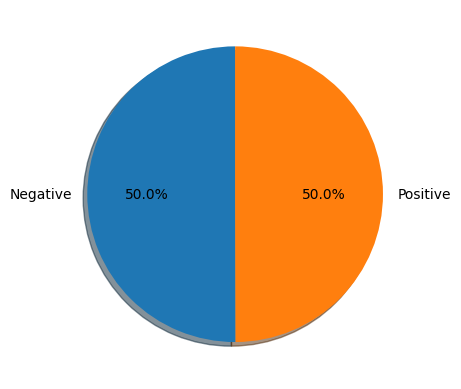

In [9]:
# For training set

plt.pie(train_set.label.value_counts(), startangle=90, autopct='%1.1f%%',
        labels=['Negative','Positive'],shadow=True)
plt.show()

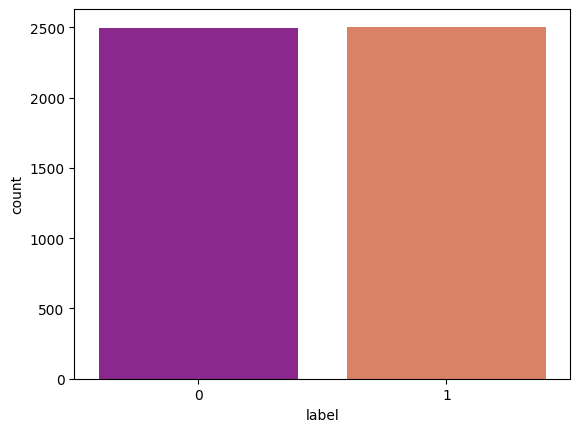

In [10]:
# For testing set

sns.countplot(data=test_set, x='label',palette='plasma')
plt.show()

### Checking shape of all datasets

In [11]:
print(train_set.shape,test_set.shape,valid_set.shape)

(40000, 2) (5000, 2) (5000, 2)


data = pd.concat([train_set,test_set,valid], axis=0)
data.shape

data.label.value_counts()

# Converting label values like 0 to Negative and 1 to Positive for better understanding.

In [12]:
def labels(x):
    if x == 1:
        x = 'Positive'
    else:
        x = 'Negative'
    return x

*The function checks if x is equal to 1. If x is equal to 1, the function assigns the string 'Positive' to x. Otherwise, the function assigns the string 'Negative' to x.*

*The function is used to convert the numeric rating values to categorical labels of either 'Positive' or 'Negative', which can be used in sentiment analysis.*

In [13]:
train_set.label = train_set.label.apply(lambda x: labels(x))
test_set.label = test_set.label.apply(lambda x: labels(x))
valid_set.label = valid_set.label.apply(lambda x: labels(x))

data.label = data.label.apply(lambda x: labels(x))

data.label.value_counts()

# Tokenization

In [14]:
def tokenizer(texts):

  token = word_tokenize(texts.lower())

  stopword = stopwords.words('english')

  stkns = [i for i in token if i not in stopword and i.isalpha()]

  lemma = WordNetLemmatizer()

  tokens = [lemma.lemmatize(i) for i in stkns]

  return ' '.join(tokens)

In [15]:
train_set.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,Negative
1,"When I put this movie in my DVD player, and sa...",Negative
2,Why do people who do not know what a particula...,Negative
3,Even though I have great interest in Biblical ...,Negative
4,Im a die hard Dads Army fan and nothing will e...,Positive


In [16]:
valid_set.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,Negative
1,someone needed to make a car payment... this i...,Negative
2,The Guidelines state that a comment must conta...,Negative
3,This movie is a muddled mish-mash of clichés f...,Negative
4,Before Stan Laurel became the smaller half of ...,Negative


In [17]:
# train_set['clean_text'] = train_set.text.apply(tokenizer)
# test_set['clean_text'] = test_set.text.apply(tokenizer)
# valid_set['clean_text'] = valid_set.text.apply(tokenizer)

In [18]:
# train_set = train_set.iloc[:, [-1,1]]
# test_set = test_set.iloc[:, [-1,1]]
# valid_set = valid_set.iloc[:, [-1,1]]

In [19]:
# train_set.to_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/mod_train.csv',index=False)
# test_set.to_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/mod_test.csv',index=False)
# valid_set.to_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/valid_test.csv',index=False)

# Using Clean Data

In [20]:
mod_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/mod_train.csv')
mod_train.head()

,clean_text,label
0,grew b watching loving thunderbird mate school...,Negative
1,put movie dvd player sat coke chip expectation...,Negative
2,people know particular time past like feel nee...,Negative
3,even though great interest biblical movie bore...,Negative
4,im die hard dad army fan nothing ever change g...,Positive


In [21]:
mod_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/mod_test.csv')
mod_test.head()

,clean_text,label
0,always wrote series complete jim belushi invol...,Negative
1,watched purcell typical mary kate ashley fare ...,Negative
2,movie poorly written directed fell asleep minu...,Negative
3,interesting thing miryang secret sunshine acto...,Positive
4,first read berlin meer expect much thought rig...,Negative


In [22]:
mod_valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/# Akashik Records/mod_test.csv')
mod_valid.head()

,clean_text,label
0,always wrote series complete jim belushi invol...,Negative
1,watched purcell typical mary kate ashley fare ...,Negative
2,movie poorly written directed fell asleep minu...,Negative
3,interesting thing miryang secret sunshine acto...,Positive
4,first read berlin meer expect much thought rig...,Negative


## Step 2: Splitting the Data

In [23]:
xtrain,ytrain = mod_train.clean_text, mod_train.label

In [24]:
xtest, ytest = mod_test.clean_text, mod_test.label

## Bag of Words

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.50,random_state=46)

*This line of Python code imports the CountVectorizer class from the feature_extraction.text module of the scikit-learn library.*

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
cv = CountVectorizer()
xtrain = cv.fit_transform(xtrain)
xtest = cv.transform(xtest)

The CountVectorizer class is used to convert a collection of text documents into a matrix of token counts, where each row of the matrix represents a document and each column represents a unique token (i.e., word) in the corpus of documents. The values in the matrix represent the count of each token in each document.

In this case, the fit_transform method of the CountVectorizer object is being used to create the matrix of token counts from the x variable, which contains the text data of the customer reviews. The resulting matrix is then converted to a NumPy array using the toarray method.

In [27]:
xtrain.shape

(40000, 79749)

In [28]:
ytrain.shape

(40000,)

In [29]:
ytrain.value_counts()

Negative    20019
Positive    19981
Name: label, dtype: int64

## Step 3: Selecting Machine Learning Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier \
,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
import xgboost
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

These are Python packages and modules used for building and evaluating different machine learning models:

1. <b>LogisticRegression</b>: a linear model used for classification tasks.
1. <b>DecisionTreeClassifier</b>: a tree-based model used for classification tasks that recursively partitions the data based on the feature that maximizes the information gain.
1. <b>RandomForestClassifier</b>: an ensemble model that combines multiple decision trees to reduce overfitting and improve generalization.
1. <b>VotingClassifier</b>: an ensemble model that combines multiple models by taking the majority vote of their predictions.

In [31]:
log = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()
gbc = GaussianNB()
mbc = MultinomialNB()
bnb = BernoulliNB()
xgb = xgboost.XGBClassifier()

## Step 4: Training the Models

In [32]:
def mymodel(x):
    for model in x:
        print('model name:', model,'\n')
        model.fit(xtrain,ytrain)
        ypred = model.predict(xtest)
        print(classification_report(ytest,ypred))
        print('Training Score:',model.score(xtrain,ytrain))
        print('Testing Score:',model.score(xtest,ytest),'\n')
        print('*'*55,'\n')

*This is a function to train and evaluate multiple machine learning models on the training and testing data.*

*The function takes a list of models as an input (x) and loops over each model, fitting the model to the training data, making predictions on the testing data, and printing the classification report, training score, and testing score for each model.*

*The classification report provides a detailed evaluation of the performance of the model, including precision, recall, and F1-score, for each class (positive and negative).*

*The training score and testing score provide an estimate of the accuracy of the model on the training and testing data, respectively.*

*Overall, this function is a useful way to quickly compare the performance of multiple machine learning models on a given dataset.*

In [33]:
models = [log,mbc,bnb,rfc]

In [34]:
mymodel(models)

model name: LogisticRegression() 

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      2495
    Positive       0.88      0.89      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Training Score: 0.985725
Testing Score: 0.8854 

******************************************************* 

model name: MultinomialNB() 

              precision    recall  f1-score   support

    Negative       0.85      0.88      0.87      2495
    Positive       0.88      0.85      0.86      2505

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

Training Score: 0.8999
Testing Score: 0.8634 

******************************************************* 

model name: BernoulliNB() 

              precision    recall  f1-sco

Based on the evaluation metrics provided, the best model appears to be the Logistic Regression model, with an accuracy of 0.89 and high precision, recall, and f1-score for both positive and negative classes. Additionally, the training score is quite high at 0.9768, indicating that the model is fitting the training data well without overfitting.

## Step 5: Hyperparameter tuning ML models

## Logistic Regression

In [35]:
def log_tuning():
  solvers = ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga']

  for solver in solvers:
      print('Solver Name:',solver,'\n')
      log = LogisticRegression(solver=solver)
      log.fit(xtrain, ytrain)
      ypred = log.predict(xtest)

      print(classification_report(ytest,ypred))
      print('Training Score:',log.score(xtrain,ytrain))
      print('Testing Score:',log.score(xtest,ytest),'\n')
      print('*'*55,'\n')

log_tuning()

Solver Name: lbfgs 

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      2495
    Positive       0.88      0.89      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Training Score: 0.985725
Testing Score: 0.8854 

******************************************************* 

Solver Name: newton-cg 

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89      2495
    Positive       0.88      0.90      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Training Score: 0.9942
Testing Score: 0.8886 

******************************************************* 

Solver Name: liblinear 

              precision    recall  f1-score   support

    Nega

# Bagging 

In [36]:
def bagging(model):
  bag = BaggingClassifier(model)

  bag.fit(xtrain, ytrain)
  ypred = bag.predict(xtest)

  print(classification_report(ytest,ypred))
  print('Training Score:',bag.score(xtrain,ytrain))
  print('Testing Score:',bag.score(xtest,ytest),'\n')
  return bag

bagging(log)

              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89      2495
    Positive       0.89      0.90      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Training Score: 0.975025
Testing Score: 0.8914 



BaggingClassifier(estimator=LogisticRegression())

In this code snippet, a BaggingClassifier is used to improve the performance of the Logistic Regression model. The BaggingClassifier fits multiple instances of the same model on different subsets of the training data and aggregates their predictions to improve the accuracy and reduce overfitting.

The evaluation metrics show the performance of the Logistic Regression model using different solvers. Overall, all solvers perform similarly, with an accuracy of 0.89 and high precision, recall, and f1-score for both positive and negative classes. However, the training scores and testing scores vary slightly among solvers, with the lbfgs and newton-cg solvers having the highest training scores, and the sag solver having the highest testing score. The saga solver has the lowest testing score. In general, the lbfgs, newton-cg, and sag solvers appear to perform better than the liblinear and saga solvers. So, selecting default logistic Regression solver as a best model.

## Random Forest

In [37]:
rfc = RandomForestClassifier(min_samples_split=3, n_estimators=200)
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

print(classification_report(ytest,ypred))
print('Training Score:',rfc.score(xtrain,ytrain))
print('Testing Score:',rfc.score(xtest,ytest),'\n')

              precision    recall  f1-score   support

    Negative       0.88      0.85      0.87      2495
    Positive       0.86      0.88      0.87      2505

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

Training Score: 1.0
Testing Score: 0.8672 



# Step 6: Evaluation

In [38]:
texts = {'Do not buy worst deal ever.': 0, 
         'buy this.': 1, 'best deal': 1, 
         'baD product': 0, 'not bad but not good.': 0, 
         'delivery was fast': 1, 
         'damaged product not gonna buy again': 0}

In [39]:
for i,v in texts.items():
  print(v)
  if v==0:
    texts[i] = 'Negative'
  else:
    texts[i] = 'Positive'

0
1
1
0
0
1
0


In [40]:
texts.values()

dict_values(['Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative'])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
def get_sentiment(model, texts=texts):
  pred = []
  print('*'*45)
  print('Mode Name:', type(model).__name__,'\n')
  print('*'*45, '\n')
  for text, idx in texts.items():
    print(f"Text: {text} \nSentiment: {[i for i in model.predict(cv.transform([text]))][0]}\n")
    pred.append([model.predict(cv.transform([text]))][0][0])
  print('*'*45)
  print('Accuracy:',accuracy_score(list(texts.values()), pred))
  print('*'*45)

In [43]:
get_sentiment(rfc)

*********************************************
Mode Name: RandomForestClassifier 

********************************************* 

Text: Do not buy worst deal ever. 
Sentiment: Negative

Text: buy this. 
Sentiment: Positive

Text: best deal 
Sentiment: Positive

Text: baD product 
Sentiment: Negative

Text: not bad but not good. 
Sentiment: Negative

Text: delivery was fast 
Sentiment: Positive

Text: damaged product not gonna buy again 
Sentiment: Positive

*********************************************
Accuracy: 0.8571428571428571
*********************************************


In [44]:
get_sentiment(log)

*********************************************
Mode Name: LogisticRegression 

********************************************* 

Text: Do not buy worst deal ever. 
Sentiment: Negative

Text: buy this. 
Sentiment: Positive

Text: best deal 
Sentiment: Positive

Text: baD product 
Sentiment: Negative

Text: not bad but not good. 
Sentiment: Negative

Text: delivery was fast 
Sentiment: Negative

Text: damaged product not gonna buy again 
Sentiment: Positive

*********************************************
Accuracy: 0.7142857142857143
*********************************************


# Step 7: Adding More Data

In [45]:
add_train = pd.concat([mod_train, mod_valid, mod_test], axis=0)
add_train.shape

(50000, 2)

In [46]:
add_train.head()

,clean_text,label
0,grew b watching loving thunderbird mate school...,Negative
1,put movie dvd player sat coke chip expectation...,Negative
2,people know particular time past like feel nee...,Negative
3,even though great interest biblical movie bore...,Negative
4,im die hard dad army fan nothing ever change g...,Positive


# Step 8: Evaluation (Part 2)

In [47]:
x, y = add_train.clean_text, add_train.label

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
# scores = []

# for i in range(51):
#   xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=i)
#   cv = TfidfVectorizer()
#   xtrain = cv.fit_transform(xtrain)
#   xtest = cv.transform(xtest)
#   log = LogisticRegression()
#   log.fit(xtrain, ytrain)
#   ypred = log.predict(xtest)
#   print('Random State', i)
#   print(classification_report(ytest,ypred))
#   print('Training Score:',log.score(xtrain,ytrain))
#   print('Testing Score:',log.score(xtest,ytest),'\n')
#   print()
#   scores.append((i, log.score(xtest,ytest)))

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=26)

In [52]:
cv = TfidfVectorizer()
xtrain = cv.fit_transform(xtrain)
xtest = cv.transform(xtest)

In [53]:
# cv = CountVectorizer()
# xtrain = cv.fit_transform(xtrain)
# xtest = cv.transform(xtest)

In [54]:
mymodel(models)

model name: LogisticRegression() 

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4941
    Positive       0.89      0.92      0.91      5059

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Training Score: 0.931825
Testing Score: 0.9027 

******************************************************* 

model name: MultinomialNB() 

              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      4941
    Positive       0.89      0.85      0.87      5059

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Training Score: 0.907175
Testing Score: 0.8719 

******************************************************* 

model name: BernoulliNB() 

              precision    recall  f1-s

# Logistic Regression

In [55]:
log_tuning()

Solver Name: lbfgs 

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4941
    Positive       0.89      0.92      0.91      5059

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Training Score: 0.931825
Testing Score: 0.9027 

******************************************************* 

Solver Name: newton-cg 

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4941
    Positive       0.89      0.92      0.91      5059

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Training Score: 0.9318
Testing Score: 0.9028 

******************************************************* 

Solver Name: liblinear 

              precision    recall  f1-score   support

    Nega

In [56]:
log = LogisticRegression()
log.fit(xtrain, ytrain)
ypred = log.predict(xtest)

print(classification_report(ytest,ypred))
print('Training Score:',log.score(xtrain,ytrain))
print('Testing Score:',log.score(xtest,ytest),'\n')

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4941
    Positive       0.89      0.92      0.91      5059

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Training Score: 0.931825
Testing Score: 0.9027 



# Voting Classifier

In [57]:
bag1 = bagging(log)

              precision    recall  f1-score   support

    Negative       0.91      0.88      0.90      4941
    Positive       0.89      0.92      0.90      5059

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Training Score: 0.928475
Testing Score: 0.9018 



In [58]:
bag2 = bagging(mbc)

              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      4941
    Positive       0.89      0.85      0.87      5059

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Training Score: 0.905075
Testing Score: 0.8711 



In [59]:
bag3 = bagging(bnb)

              precision    recall  f1-score   support

    Negative       0.84      0.89      0.86      4941
    Positive       0.89      0.83      0.86      5059

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Training Score: 0.894775
Testing Score: 0.8618 



In [60]:
estimators = [(type(m).__name__, m) for m in models[:-1]]
voting = VotingClassifier(estimators=estimators)
voting.fit(xtrain, ytrain)
ypred = voting.predict(xtest)

print(classification_report(ytest,ypred))
print('Training Score:',voting.score(xtrain,ytrain))
print('Testing Score:',voting.score(xtest,ytest),'\n')

              precision    recall  f1-score   support

    Negative       0.87      0.90      0.88      4941
    Positive       0.90      0.86      0.88      5059

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Training Score: 0.9149
Testing Score: 0.8806 



In [69]:
bags = [bag1, bag2, bag3, rfc]

In [70]:
estimators = [(f'{type(m).__name__}{i}', m) for i,m in enumerate(bags)]
voting = VotingClassifier(estimators=estimators)
voting.fit(xtrain, ytrain)
ypred = voting.predict(xtest)

print(classification_report(ytest,ypred))
print('Training Score:',voting.score(xtrain,ytrain))
print('Testing Score:',voting.score(xtest,ytest),'\n')

              precision    recall  f1-score   support

    Negative       0.86      0.92      0.89      4941
    Positive       0.92      0.85      0.88      5059

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Training Score: 0.928625
Testing Score: 0.8859 



In [72]:
get_sentiment(voting)

*********************************************
Mode Name: VotingClassifier 

********************************************* 

Text: Do not buy worst deal ever. 
Sentiment: Negative

Text: buy this. 
Sentiment: Positive

Text: best deal 
Sentiment: Positive

Text: baD product 
Sentiment: Negative

Text: not bad but not good. 
Sentiment: Negative

Text: delivery was fast 
Sentiment: Negative

Text: damaged product not gonna buy again 
Sentiment: Positive

*********************************************
Accuracy: 0.7142857142857143
*********************************************


In [73]:
get_sentiment(bag1)

*********************************************
Mode Name: BaggingClassifier 

********************************************* 

Text: Do not buy worst deal ever. 
Sentiment: Negative

Text: buy this. 
Sentiment: Positive

Text: best deal 
Sentiment: Positive

Text: baD product 
Sentiment: Negative

Text: not bad but not good. 
Sentiment: Negative

Text: delivery was fast 
Sentiment: Positive

Text: damaged product not gonna buy again 
Sentiment: Positive

*********************************************
Accuracy: 0.8571428571428571
*********************************************


In [74]:
get_sentiment(log)

*********************************************
Mode Name: LogisticRegression 

********************************************* 

Text: Do not buy worst deal ever. 
Sentiment: Negative

Text: buy this. 
Sentiment: Positive

Text: best deal 
Sentiment: Positive

Text: baD product 
Sentiment: Negative

Text: not bad but not good. 
Sentiment: Negative

Text: delivery was fast 
Sentiment: Positive

Text: damaged product not gonna buy again 
Sentiment: Positive

*********************************************
Accuracy: 0.8571428571428571
*********************************************
